Ghazaleh Zehtab
HW5, Q2

In [172]:
import jenkspy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## a

In [173]:
df = pd.read_csv("Banknote.csv")
df

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


## b

In [174]:
df=df.replace('MISS',np.nan)
df=df.replace('missing',np.nan)
df=df.replace('NULL',np.nan)
df=df.replace("''",np.nan)
df=df.replace("?",np.nan)
df.columns=['c1','c2','c3','c4','goal']
df.c1 = df.c1.fillna(df.c1.mean())
df.c2 = df.c2.fillna(df.c2.mean())
df.c3 = df.c3.fillna(df.c3.mean())
df.c4 = df.c4.fillna(df.c4.mean())
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)
df = df.astype({"goal": int})
df

,c1,c2,c3,c4,goal
0,0.835659,0.820982,0.121804,0.644326,0
1,0.786629,0.416648,0.310608,0.786951,0
2,0.757105,0.871699,0.054921,0.450440,0
3,0.531578,0.348662,0.424662,0.687362,0
4,0.822859,0.877275,0.057100,0.489711,0
...,...,...,...,...,...
1366,0.537124,0.565855,0.165249,0.726398,1
1367,0.407690,0.332868,0.506753,0.808350,1
1368,0.237385,0.011768,0.985603,0.524755,1
1369,0.250842,0.201701,0.761587,0.660675,1


## c

In [175]:
clo = df.values[:, 0:4]
fit_m = PCA(n_components=2).fit(clo)
new_clo = fit_m.transform(clo)
k_means = KMeans(init="k-means++", n_clusters=2)
k_means.fit(clo)
k_predict = k_means.predict(clo)

## d

In [176]:
d = np.column_stack((new_clo, k_predict))
centroids = fit_m.transform(k_means.cluster_centers_)
centroids

array([[-0.24203572,  0.06385481],
       [ 0.23336681, -0.06156774]])

## e

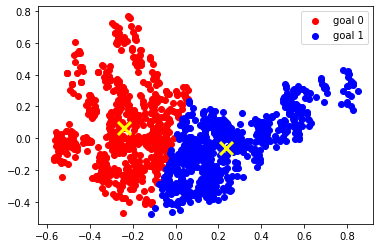

In [177]:
plt.scatter(d[d[:,2] == 0][:,0], d[d[:,2] == 0][:,1], color = 'r',label = 'goal 0')
plt.scatter(d[d[:,2] == 1][:,0], d[d[:,2] == 1][:,1], color = 'b',label = 'goal 1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="yellow", zorder=10)
plt.legend()
plt.show()

## g :inertia

In [178]:
k_means.inertia_

138.05271054394973

## h

In [179]:
inertia_list = []
for i in range(1,6):
    k_means = KMeans(init="k-means++", n_clusters=i)
    k_means.fit(d)
    inertia_list.append(k_means.inertia_)
inertia_list

[535.2907792275818,
 109.82646748322296,
 77.74512996900927,
 51.467025087392585,
 41.36598163646291]

## i

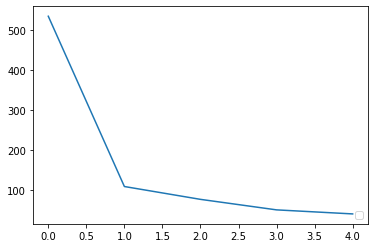

In [180]:
plt.legend(['k-means inertia'], loc='lower right')
plt.plot(inertia_list)




## j

In [181]:
silhouette_list = []
for i in range(2,6):
    fig, (first, second) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    K_means_cluster = KMeans(n_clusters = i, random_state = 20)
    Predict_cluster = K_means_cluster.fit_predict(d)

    score_silhouette = silhouette_score(d, Predict_cluster)
    silhouette_list.append(score_silhouette)
    value_for_plot = silhouette_samples(d, Predict_cluster)

    y_l = 10
    for j in range(i):
        counter_cluster = \
            value_for_plot[Predict_cluster == j]
        counter_cluster.sort()
        counter_shape = counter_cluster.shape[0]
        y_u = y_l + counter_shape
        color = cm.nipy_spectral(float(j) / i)
        first.fill_betweenx(np.arange(y_l, y_u),
                          0, counter_cluster,
                          facecolor=color, edgecolor=color, alpha=0.7)
        first.text(-0.05, y_l + 0.5 * counter_shape, str(i))
        y_l = y_u + 10

    first.set_title("Cluster's plot of the silhouette")
    first.set_xlabel("coefficient")
    first.set_ylabel("label")
    first.axvline(x=score_silhouette, color="blue", linestyle="--")
    first.set_yticks([])  
    first.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    my_color = cm.nipy_spectral(Predict_cluster.astype(float) / i)
    second.scatter(new_clo[:, 0], new_clo[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=my_color, edgecolor='k')
    cc = fit_m.transform(K_means_cluster.cluster_centers_)
    second.scatter(cc[:, 0], cc[:, 1], marker='x',
                c="white", alpha=0.5, s=300, edgecolor='k')

    for j, k in enumerate(cc):
        second.scatter(k[0], k[1], marker='$%d$' % j, alpha=1,
                    s=50, edgecolor='k')

        second.set_title("clustered data visualization : ")
        second.set_xlabel("C1")
        second.set_ylabel("C2")

        plt.suptitle(("KMeans clustering  "
                  "with n_clusters = %d" % i),
                    fontsize=16)
plt.show()
print(silhouette_list)
plt.figure()
plt.plot(silhouette_list)
